In [1]:
import requests
from bs4 import BeautifulSoup
import lxml
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import re
# Getting that SKLearn Dataset
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

#Gridsearch and scoring
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

# Train test
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# read my_scraping_final.xlsx into a DataFrame
salary = pd.read_excel("../Noelia/my_scraping_final.xlsx")
salary.head()

,Job Category,company,description,location,summary,title,salary_mean,Salary_type
14677,Business Analyst,Bolton Clarke,Give yourself a pay rise - eligibility for up ...,Australia,Strong understanding of business analytics too...,Business Performance Analyst,15900.0,0
25428,Data Consultant,Robert Half Australia,Are you a sales superstar? Great opportunity t...,Melbourne VIC,Great opportunity to join a large team as a Cu...,Telesales Consultant | $53K + Super | Temp to ...,25000.0,0
8896,Big Data,Swinburne University of Technology,"Faculty of Science, Engineering and Technology...",Melbourne VIC,A 3 year fully-funded PhD scholarship is avail...,PhD Scholarship – Big Data Analytics for Oil D...,25849.0,0
25510,Data Consultant,Kennedy Reid,The recruitment industry is one that is overlo...,Sydney NSW,High data entry speed and excellent attention ...,Recruitment Administrator,42500.0,0
15837,Business Analyst,Janison Solutions,THE GIGThe Learning Support Specialist primary...,Coffs Harbour NSW,"Our passion for excellence, innovation and per...",Learning Support Specialist,42500.0,0


Let's see how the count of the low and high salaries

In [3]:
#Gest the description of the column 'Salary_type'
salary.groupby('Salary_type').describe()

salary_mean                                                   \
                  count           mean           std       min       25%   
Salary_type                                                                
0                 546.0   81659.589744  14561.242243   15900.0   72500.0   
1                 557.0  132631.139138  25514.445571  103379.0  115000.0   

                                           
                  50%       75%       max  
Salary_type                                
0             85000.0   92500.0  103103.0  
1            125000.0  140000.0  260000.0

Now I would like to do NLP to check out the importance of the words in the description column, which words appear the most.

In [74]:
# defines X and y
X = salary['description']
y = salary.Salary_type

# splits the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

Let's check out now our baseline.

In [5]:
base_line= np.mean(salary.Salary_type)
base_line

0.5049864007252947

In [6]:
len(salary['description'])

1103

In [7]:
len(salary.Salary_type)

1103

Use CountVectorizer to convert the training and testing text data

In [75]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))
# Fit our vectorizer using our train data
vect.fit(X_train)


CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
#Lets check the length of our data that is in a vectorized state
len(vect.get_feature_names())

87495

In [10]:
# Transforming our x_train data using our fit vect.
# And converting the result to a DataFrame.
XX_train = pd.DataFrame(vect.transform(X_train).todense(),
                       columns=vect.get_feature_names())

In [11]:
# Which words appear the most?
word_counts = XX_train.sum(axis=0)
word_counts.sort_values(ascending = False).head(30)

data           3193
experience     2602
business       1844
work           1652
team           1455
role           1422
skills         1389
development    1017
working        1009
research        974
management      920
support         798
position        798
ability         793
information     791
apply           775
strong          730
analysis        678
science         656
including       631
services        629
analytics       611
technical       594
new             592
learning        589
client          589
time            587
technology      570
provide         565
high            562
dtype: int64

A pipeline is a way for us to construct a function to execute the same tasks continuously in our variable model we fit a vectorizer, and a model our Model variable is stored with the fit vectorizer and model so we we call model.xxxx it uses that information stored.
We are gonna create a function to try the different models and see with which one I get better resaults.


# Training the different Models to see which one suits better

We will use Lemmatizing method to see if our score improves

In [12]:
#Creates the Lemmatokenizer class
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [13]:
#Creates a function to try the different models and print out the score
from sklearn.tree import DecisionTreeClassifier
def Models_Acc(XTrain, yTrain, XTest, yTest, ngramRange=(1, 2)):
    for Vect in range(1,13):
        if Vect == 1:
            model = make_pipeline(HashingVectorizer(stop_words='english',
                                                    non_negative=True,
                                                    n_features=2**16),
                    LogisticRegression()

            )
            print '-----------------------------------------------------------------------------------------'
            print 'Hashing Vectorizer and Logistic Regression'
        elif Vect == 2:
            model = make_pipeline(TfidfVectorizer(stop_words='english',
                                          sublinear_tf=True,
                                          max_df=0.5,
                                          max_features=1000,
                                          ngram_range=ngramRange),
                    LogisticRegression()
                          )
            print '-----------------------------------------------------------------------------------------'
            print 'TfidfVectorizer using {} ngram and Logistic Regression'.format(ngramRange)
            
        elif Vect == 3:
            model = make_pipeline(CountVectorizer(stop_words='english', ngram_range=ngramRange),
                          LogisticRegression()
                          )
            print '-----------------------------------------------------------------------------------------'
            print 'CountVectorizer with {} ngram and Logistic Regression'.format(ngramRange)
            
        elif Vect == 5: 
            model = make_pipeline(CountVectorizer(stop_words='english', ngram_range=ngramRange, tokenizer=LemmaTokenizer()),
                          LogisticRegression()
                          )
            print '-----------------------------------------------------------------------------------------'
            print 'CountVectorizer with LemmaTokenizer and {} ngram and Logistic Regression'.format(ngramRange)
            
        elif Vect == 6:
            model = make_pipeline(CountVectorizer(stop_words='english', ngram_range=ngramRange),
                          DecisionTreeClassifier(),
                      )
            print '-----------------------------------------------------------------------------------------'
            print 'CountVectorizer with {} and MultinomialNB Regression'.format(ngramRange)
        elif Vect == 7:
            model = make_pipeline(CountVectorizer(stop_words='english', ngram_range=ngramRange),
                          RandomForestClassifier(),
                      )
            print '-----------------------------------------------------------------------------------------'
            print 'CountVectorizer with {} and Random Forest Regression'.format(ngramRange)
        elif Vect == 8:
            model = make_pipeline(CountVectorizer(stop_words='english', ngram_range=ngramRange),
                          DecisionTreeClassifier())
            print '-----------------------------------------------------------------------------------------'
            print 'CountVectorizer with {} and Decision Tree'.format(ngramRange)
        elif Vect == 9:
            model = make_pipeline(CountVectorizer(stop_words='english', ngram_range=ngramRange),
                          AdaBoostClassifier())
            print '-----------------------------------------------------------------------------------------'
            print 'CountVectorizer with {} and AdaBoost'.format(ngramRange)
        elif Vect == 10:
            model = make_pipeline(TfidfVectorizer(stop_words='english',
                                          sublinear_tf=True,
                                          max_df=0.5,
                                          max_features=1000,
                                          ngram_range=ngramRange),
                    DecisionTreeClassifier()
                          )
            print '-----------------------------------------------------------------------------------------'
            print 'TfidfVectorizer using {} ngram and DecisionTreeClassifier'.format(ngramRange)
        elif Vect ==11:
            model = make_pipeline(TfidfVectorizer(stop_words='english',
                                          sublinear_tf=True,
                                          max_df=0.5,
                                          max_features=1000,
                                          ngram_range=ngramRange),
                    RandomForestClassifier()
                          )
            print '-----------------------------------------------------------------------------------------'
            print 'TfidfVectorizer using {} ngram and RandomForestClassifier'.format(ngramRange) 
        elif Vect == 12:
            model = make_pipeline(CountVectorizer(stop_words='english', ngram_range=ngramRange, tokenizer=LemmaTokenizer()),
                                  SVC(kernel='linear'))
            print '-----------------------------------------------------------------------------------------'
            print 'CountVectorizer with LemmaTokenizer with {} and SVM'.format(ngramRange)
        model.fit(XTrain, yTrain)
        y_pred = model.predict(XTest)
        print 'Accuracy:',accuracy_score(yTest, y_pred)
            

    

Let's call the function we've created before to see what model performs better

In [14]:
Models_Acc(X_train, y_train, X_test, y_test, ngramRange=(2, 2))

-----------------------------------------------------------------------------------------
Hashing Vectorizer and Logistic Regression


/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


Accuracy: 0.812688821752
-----------------------------------------------------------------------------------------
TfidfVectorizer using (2, 2) ngram and Logistic Regression
Accuracy: 0.827794561934
-----------------------------------------------------------------------------------------
CountVectorizer with (2, 2) ngram and Logistic Regression
Accuracy: 0.870090634441
Accuracy: 0.870090634441
-----------------------------------------------------------------------------------------
CountVectorizer with LemmaTokenizer and (2, 2) ngram and Logistic Regression
Accuracy: 0.873111782477
-----------------------------------------------------------------------------------------
CountVectorizer with (2, 2) and MultinomialNB Regression
Accuracy: 0.821752265861
-----------------------------------------------------------------------------------------
CountVectorizer with (2, 2) and Random Forest Regression
Accuracy: 0.809667673716
-------------------------------------------------------------------

We can use Gridsearching to get the best performance parameters to use them in our models and see how they go

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('mult', LogisticRegression()),
])
CV_parameters = { 'vect__ngram_range':((1, 1),(1, 2), (2, 2), (1, 3)),
                  'vect__stop_words': ['english'],
}
CV_gridsearch = GridSearchCV(pipeline, CV_parameters, n_jobs=-1, verbose=1)

CV_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   10.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': ((1, 1), (1, 2), (2, 2), (1, 3)), 'vect__stop_words': ['english']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [78]:
print CV_gridsearch.best_score_
print CV_gridsearch.best_params_

predictions = CV_gridsearch.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

0.835492227979
{'vect__ngram_range': (2, 2), 'vect__stop_words': 'english'}
0.870090634441


In [55]:
# define X and y
X = salary['summary']
y = salary.Salary_type

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# Lets use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(stop_words='english', ngram_range=(2,2))

# Fit our vectorizer using our train data
cvec.fit(X_train)

X_train = pd.DataFrame(cvec.transform(X_train).todense(),
                       columns=cvec.get_feature_names())
X_test = pd.DataFrame(cvec.transform(X_test).todense(),
                      columns=cvec.get_feature_names())
#Import and fit our logistic regression and test it too
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.7643504531722054

In [56]:
predictions = lr.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[144  23]
 [ 55 109]]
             precision    recall  f1-score   support

          0       0.72      0.86      0.79       167
          1       0.83      0.66      0.74       164

avg / total       0.77      0.76      0.76       331



In [1]:
# columns  =  np.array(cvec.get_feature_names())
# def list_important_pred_var(data):
#     important_pred_var = pd.DataFrame(data, columns = ["coef"], index = columns)
#     return important_pred_var.sort_values(["coef"], ascending = False)[:30]

# list_important_pred_var(lr.coef_.T)


#### Let's get now our original data with the Articles that didn't have salary to predict if they are Jobs with low or high salaries

In [20]:
Articles_nan_Salary = pd.read_excel("../Noelia/my_original_scraping_with_description_and_nulls.xlsx")
Articles_nan_Salary = Articles_nan_Salary[Articles_nan_Salary["salary"].isnull()]
Articles_nan_Salary.head()
test = pd.DataFrame(cvec.transform(Articles_nan_Salary["description"]).todense(),
                       columns=cvec.get_feature_names())
Articles_nan_Salary["salary"] = lr.predict(test)

In [21]:
Articles_nan_Salary.head(100)

,Job Category,company,description,location,salary,summary,title
1,Data Science,Metigy,@metigy we are creating the next generation of...,Sydney NSW 2000,1,"Because of the nature of our platform, Data Sc...",Lead Data Scientist
2,Data Science,HDR,"HDR specializes in architecture, engineering, ...",Sydney NSW 2000,1,Continuously learn and develop new skills in d...,Data Scientist
3,Data Science,International Institute of Data & Analytics,The International Institute of Data & Analytic...,Sydney NSW,1,"In data science and big data analytics, the ID...",Junior Data Analyst/Scientist
4,Data Science,SAI Global,"At SAI Global, we make Intelligent Risk possib...",Sydney NSW,1,Analytics or data science team in a commercial...,Data Scientist
5,Data Science,Velrada,Giving you the platform to succeed:\nWorking o...,Melbourne VIC,1,With a background in development across Data M...,Data Scientist
6,Data Science,BuildingIQ,"Job Description | Location – Sydney, Australia...",Sydney NSW,1,We are looking for a Data Scientist to be a pa...,Data Scientist
7,Data Science,Fortune Select,Location: Sydney\n\nJob Type: Permanent\n\nSki...,Sydney NSW,1,3+ years proven career history in Data science...,Data Scientist
8,Data Science,BCG Digital Ventures,Syphen is on the mission to unlock the potenti...,Sydney NSW,1,Significant experience in data science field. ...,Data Scientist - Machine Learning Data Platform
9,Data Science,Arup,Data Scientist (SYDDO)\nPrimary Location: Aust...,Sydney NSW,1,Experience in applying data science methods to...,Data Scientist
10,Data Science,SiteMinder,"SiteMinder is the chosen solution for over , h...",Sydney NSW,1,"Data science, analytics, economic consulting);...",Data Scientist


##### Analizing our results, we can say our model works very well.

Now let's append the two dataframes, the one with the salaries and the one that got the predictions we've made to do our next excercise

In [22]:
#Appends two dataframes
Articles_nan_Salary = Articles_nan_Salary.append(salary)

What We are gonna do now is to get the job titles we would like to analyze and edit the dataframe that will contain only our jobs Articles  

In [23]:
#Creates a new column with the title information and make all the words lower case.
Articles_nan_Salary["Job_Title"]=Articles_nan_Salary["title"]
Articles_nan_Salary["Job_Title"]= Articles_nan_Salary["Job_Title"].str.lower()
Articles_nan_Salary.shape

(6673, 10)

In [24]:
Articles_nan_Salary.shape

(6673, 10)

In [25]:
#Searchs the words in the dataframe and return the Articles that contain those words
def search(df, *words):
   """
   Return a sub-DataFrame of those rows whose Name column match all the words.
   """
   return df[np.logical_and.reduce([df.str.contains(word) for word in words])]

In [26]:
Articles_nan_Salary.loc[search(Articles_nan_Salary["Job_Title"],"junior","data","sci").index,"Job_Title"] = "junior data science"
Articles_nan_Salary.loc[search(Articles_nan_Salary["Job_Title"],"data","sci","senior").index,"Job_Title"] = "senior data Science"
Articles_nan_Salary.loc[search(Articles_nan_Salary["Job_Title"],"softw","engin").index,"Job_Title"] = "Software Engineer"
Articles_nan_Salary.loc[search(Articles_nan_Salary["Job_Title"],"junior","data", "analy").index,"Job_Title"] = "Junior Data Analyst"
Articles_nan_Salary.loc[search(Articles_nan_Salary["Job_Title"],"business","analyst").index,"Job_Title"] = "Business Analyst"
Articles_nan_Salary.loc[search(Articles_nan_Salary["Job_Title"],"data","sci", "lead").index,"Job_Title"] = "Lead data Scientist"
Articles_nan_Salary.loc[search(Articles_nan_Salary["Job_Title"],"data","big").index,"Job_Title"] = "Big Data"

In [27]:
#Creates a list of the jobs 
list_jobs= ["junior data science", "senior data Science", "Software Engineer", "Junior Data Analyst","Business Analyst"
           "Lead data Scientist", "Big Data"]
#Get's the Articles where the job title is in the list 
Articles_nan_Salary = Articles_nan_Salary[Articles_nan_Salary["Job_Title"].isin(list_jobs)]
Articles_nan_Salary.head()

,Job Category,Salary_type,company,description,location,salary,salary_mean,summary,title,Job_Title
3,Data Science,NaN,International Institute of Data & Analytics,The International Institute of Data & Analytic...,Sydney NSW,1.0,NaN,"In data science and big data analytics, the ID...",Junior Data Analyst/Scientist,junior data science
24,Data Science,NaN,Google,Google's software engineers develop the next-g...,Sydney NSW,1.0,NaN,"BS degree in Computer Science, similar technic...",Software Engineer,Software Engineer
36,Data Science,NaN,HelloFresh,About HelloFresh\n\nWe are the leading global ...,Sydney NSW,0.0,NaN,You have at least 1-year previous experience w...,Junior Data Analyst - Internship,Junior Data Analyst
39,Data Science,NaN,Healthdirect Australia,"The Data Analyst extracts, analyses and interp...",Sydney Central Business District NSW,0.0,NaN,Effective management of assigned Healthdirect ...,Junior-Data-and-Reporting-Analyst,Junior Data Analyst
83,Data Science,NaN,Google,The Google Cloud Platform team helps customers...,Sydney NSW,1.0,NaN,3 years of experience building machine learnin...,"Strategic Cloud Engineer, Machine Learning and...",Big Data


In [28]:
Articles_nan_Salary.shape

(424, 10)

##### Let's train our models ans see how they perform with this new data

In [29]:
# define X and y
X = Articles_nan_Salary["description"]
y = Articles_nan_Salary["Job_Title"]

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [30]:
a = y.unique()
a

array(['junior data science', 'Software Engineer', 'Junior Data Analyst',
       'Big Data', 'senior data Science'], dtype=object)

In [31]:
Models_Acc(X_train, y_train, X_test, y_test, ngramRange=(1, 2))

-----------------------------------------------------------------------------------------
Hashing Vectorizer and Logistic Regression


/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


Accuracy: 0.84375
-----------------------------------------------------------------------------------------
TfidfVectorizer using (1, 2) ngram and Logistic Regression
Accuracy: 0.8359375
-----------------------------------------------------------------------------------------
CountVectorizer with (1, 2) ngram and Logistic Regression
Accuracy: 0.9609375
Accuracy: 0.9609375
-----------------------------------------------------------------------------------------
CountVectorizer with LemmaTokenizer and (1, 2) ngram and Logistic Regression
Accuracy: 0.9609375
-----------------------------------------------------------------------------------------
CountVectorizer with (1, 2) and MultinomialNB Regression
Accuracy: 0.9609375
-----------------------------------------------------------------------------------------
CountVectorizer with (1, 2) and Random Forest Regression
Accuracy: 0.953125
-----------------------------------------------------------------------------------------
CountVectorizer

As we can see Count Vectorizer with Logistic regression get the best score of 1,  

In [60]:
# define X and y
X = Articles_nan_Salary["description"]
y = Articles_nan_Salary["Job_Title"]

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
# Lets use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(stop_words='english', ngram_range=(1,2))

# Fit our vectorizer using our train data
cvec.fit(X_train)

X_train = pd.DataFrame(cvec.transform(X_train).todense(),
                       columns=cvec.get_feature_names())
X_test = pd.DataFrame(cvec.transform(X_test).todense(),
                      columns=cvec.get_feature_names())
#Import and fit our logistic regression and test it too
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9609375

In [61]:
predictions = lr.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[31  0  0  0  2]
 [ 0  6  1  0  0]
 [ 2  0 69  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 12]]
                     precision    recall  f1-score   support

           Big Data       0.94      0.94      0.94        33
Junior Data Analyst       1.00      0.86      0.92         7
  Software Engineer       0.99      0.97      0.98        71
junior data science       1.00      1.00      1.00         5
senior data Science       0.86      1.00      0.92        12

        avg / total       0.96      0.96      0.96       128



In [62]:
columns  =  np.array(cvec.get_feature_names())

def list_important_pred_var(data):
    important_pred_var = pd.DataFrame(data, columns = ["coef"], index = columns)
    return important_pred_var.sort_values(["coef"], ascending = False)[:30]

list_important_pred_var(lr.coef_[0]).head(13)


,coef
big data,0.470840
big,0.444034
hadoop,0.316142
experience,0.306888
cloud,0.252827
devops,0.146875
solutions,0.146405
years,0.136193
leading,0.129091
program,0.122685


In [64]:
# define X and y
X = salary['summary']
y = salary.salary_mean
# use CountVectorizer to create document-term matrices from X_train and X_test
cv = CountVectorizer(stop_words='english', ngram_range=(1, 2))
# Fit our vectorizer using our train data
X = cv.fit_transform(X)

# splits the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [66]:
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
lm = LinearRegression()

In [68]:
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

Text(0,0.5,u'Predicted Y')

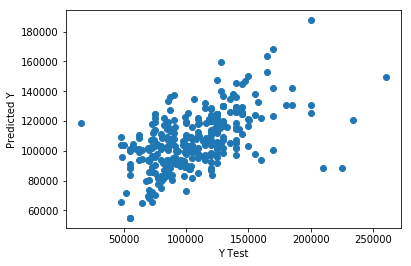

In [69]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [70]:
def calculate_r2(y, yhat):
    # estimated error 
    err_tot = (y-np.mean(y))**2
    # residual error
    err_res = (y - yhat)**2
    # total sum of squares
    ss_tot = np.sum(err_tot)
    # residual sum of squares
    ss_res = np.sum(err_res)
    return 1 - (ss_res/ss_tot)

In [71]:
calculate_r2(y_test, predictions)

0.3371010267434851